# Kaggle - Titanic Dataset

##Data Viz

## Data Exploration

#### Import libraries and datasets

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
try:
    train = pd.read_csv('input/train.csv')
    test = pd.read_csv('input/test.csv')
except FileNotFoundError:
    print("ERROR: You should put train.csv and test.csv files in the folder called input")

#### Explore the training set

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId, Name, Ticket and Cabin don't seem really useful for our predictions, so we'll remove themto keep it simple

In [21]:
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Count of column age indicates we have missing values. Let's clean the datset by removing these (not the best solution but will let us do the plots).

In [22]:
train_clean = train.copy().dropna()
train_clean["Sex_num"] = train_clean.Sex.apply(lambda x: 1 if x == 'female' else 0)
train_clean.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.363764
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


 * In our training set there's only 38% of survivers
 * And 36% women
 * Ages range from 0.42 to 80 and the avg is 29.6
 * At first sight it looks like there could be outliers in the Fare



In [23]:
train.Fare.sort_values(ascending=False).head(10)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
Name: Fare, dtype: float64

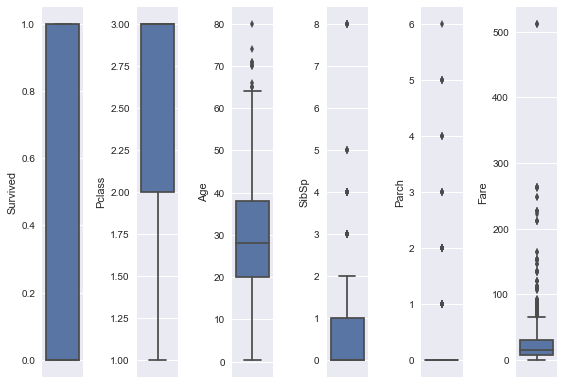

In [31]:
# Function to draw boxplots for each numeric feature of a given DataFrame
def boxplots_all_columns(df):
    plt.figure()
    num_feat_df = df.select_dtypes(include = [np.number])
    n=num_feat_df.shape[1]
    plt.figure()
    for i,col in enumerate(num_feat_df.columns):
      plt.subplot(1,n,i+1)
      sns.boxplot(train[col],orient = 'v')
    plt.tight_layout()
    plt.show()

boxplots_all_columns(train)

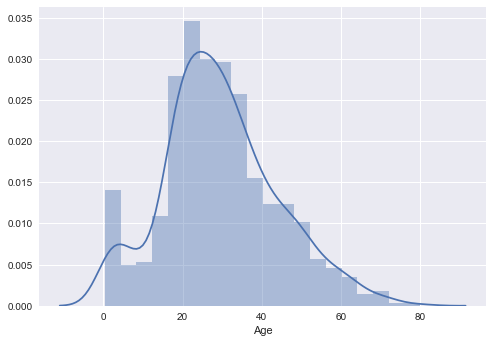

In [34]:
#Age
plt.figure()
sns.distplot(train_clean.Age)
plt.show()

A lot of newborns

### How does gender affect the chance of survival?

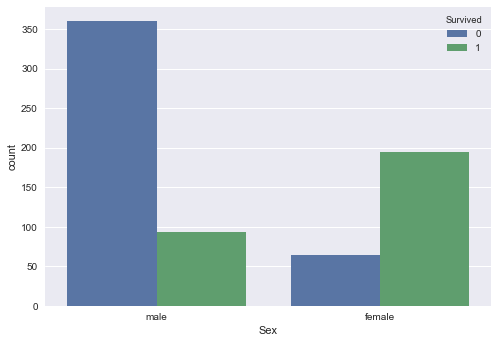

In [37]:
sns.countplot(x='Sex', hue='Survived', data = train_clean);
plt.show()

### Does it change accross different ages?

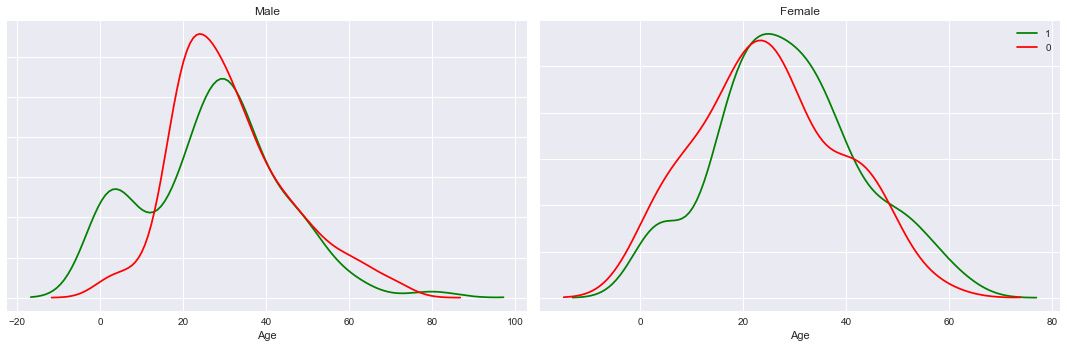

In [39]:
survived = train_clean[train_clean.Survived == 1]
nsurvived = train_clean[train_clean.Survived == 0]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
p1 = sns.distplot(survived[survived.Sex=='male'].Age, color = 'g', hist=False)
sns.distplot(nsurvived[nsurvived.Sex=='male'].Age, color = 'r', hist=False)
p1.set_title('Male');
p1.axes.get_yaxis().set_ticklabels([])


plt.subplot(1,2,2)
p = sns.distplot(survived[survived.Sex=='female'].Age, color = 'g', hist=False, label = 'Survived')
sns.distplot(nsurvived[nsurvived.Sex=='female'].Age, color = 'r', hist=False, label = 'Sank')
p.set_title('Female');
plt.legend(['1','0'])
p.axes.get_yaxis().set_ticklabels([])
plt.tight_layout()

plt.show()

# or you could also just run this: sns.violinplot(x="Age",y="Sex", hue="Survived", data=train_clean, split = True);



*   Young men have a high chance of surviving, unlike female children
*   The opposite happens for the elderly



## How about PClass?

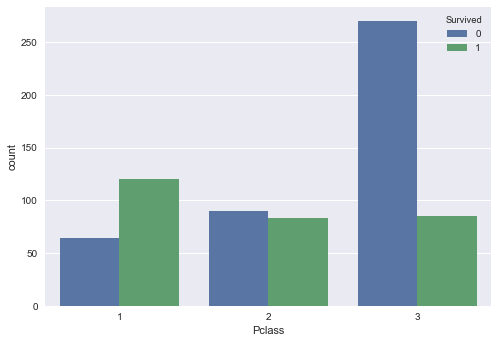

In [38]:
sns.countplot(x='Pclass', hue='Survived', data = train.dropna());
plt.show()

Pclass seems to influence the outcome: 3rd class people have a much lower chance of surviving

## And Fare

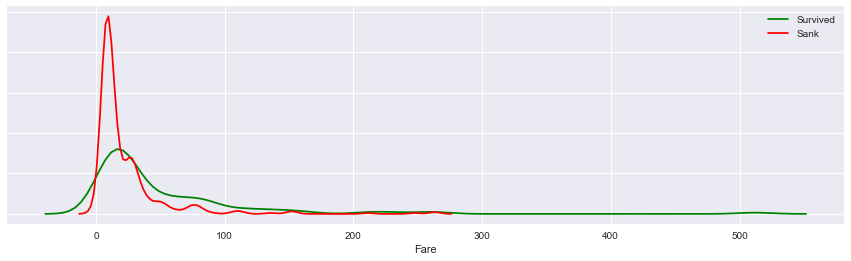

In [42]:
plt.figure(figsize=(15,4))
p=sns.distplot(survived.Fare, color = 'g', hist=False, label = 'Survived')
p = sns.distplot(nsurvived.Fare, color = 'r', hist=False, label = 'Sank')
p.axes.get_yaxis().set_ticklabels([])
plt.show()